<a href="https://colab.research.google.com/github/softwareTM/video_to_text_caption/blob/main/video_to_text_caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import sys
import numpy as np

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
import tensorflow_hub as hub

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import collections
import re
import string
import tempfile
import time

import cv2

In [ ]:
# log into drive from colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Extract video frame features using an EfficientNet

In [ ]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 5.7MB/s 


In [ ]:
from pyunpack import Archive

In [ ]:
Archive('/content/drive/MyDrive/MLDS_hw2_data/training_video.rar').extractall('/content/MLDS_hw2_data/training_data/video')

In [ ]:
training_videos_path = os.getcwd() + '/MLDS_hw2_data/training_data/video'
training_videos_path1

'/content/MLDS_hw2_data/training_data/video'

In [ ]:
from os import walk

_, _, filenames = next(walk(training_videos_path))

In [ ]:
filenames

['2F9jX7u5nOg_83_97.avi',
 '._ZnLgsasu82g_71_81.avi',
 '6t0BpjwYKco_80_84.avi',
 '._yPNFVj-pISU_105_115.avi',
 '4QYPZM01xFE_14_26.avi',
 'qeKX-N1nKiM_37_43.avi',
 'eyMYc-37Sk4_0_10.avi',
 '6KS8R3RxrV8_0_23.avi',
 'Tied-t1fFsk_15_20.avi',
 '._-_hbPLsZvvo_211_219.avi',
 '._DKZg4kIEa0A_31_36.avi',
 'giLxPCgLLqg_9_19.avi',
 '._-wa0umYJVGg_168_176.avi',
 'BVjvRpmHg0w_47_51.avi',
 '._1kYWws89W3Y_0_5.avi',
 'rlQ2kW-FvMk_66_79.avi',
 'CL49s8bO6Fg_1_11.avi',
 '6owu8Mow0_g_527_534.avi',
 'bAYIIlX-WWw_5_15.avi',
 'WTf5EgVY5uU_104_108.avi',
 'ObBss94n3gI_35_46.avi',
 '._-_hbPLsZvvo_323_328.avi',
 '._rw9h_574HxE_229_236.avi',
 '._sXyjCgR0rAc_0_11.avi',
 '._Yh2N6ZtRBdU_110_120.avi',
 'fHfpMUDrQCs_17_31.avi',
 'TZ860P4iTaM_11_20.avi',
 'IAvBB2lv8iw_142_148.avi',
 '_WRC7HXBJpU_395_401.avi',
 'WFNXwor69-U_33_40.avi',
 '._YmXCfQm0_CA_68_75.avi',
 'hJFBXHtxKIc_204_209.avi',
 'IBgsLmDcL78_80_84.avi',
 '._xxHx6s_DbUo_32_36.avi',
 '._4ge5_V-xhP0_138_142.avi',
 'QMJY29QMewQ_42_52.avi',
 '._itxzpFW1z7E_22_36.

In [ ]:
working_filenames = [x for x in filenames if not x.startswith('.')]

In [ ]:
# make sure only videos are kept
working_filenames = [x for x in working_filenames if x.endswith('.avi')]

In [ ]:
working_filenames[0]

'2F9jX7u5nOg_83_97.avi'

In [ ]:
len(working_filenames)

1450

In [ ]:
working_video_names = [x[:-4] for x in working_filenames]
working_video_names

['2F9jX7u5nOg_83_97',
 '6t0BpjwYKco_80_84',
 '4QYPZM01xFE_14_26',
 'qeKX-N1nKiM_37_43',
 'eyMYc-37Sk4_0_10',
 '6KS8R3RxrV8_0_23',
 'Tied-t1fFsk_15_20',
 'giLxPCgLLqg_9_19',
 'BVjvRpmHg0w_47_51',
 'rlQ2kW-FvMk_66_79',
 'CL49s8bO6Fg_1_11',
 '6owu8Mow0_g_527_534',
 'bAYIIlX-WWw_5_15',
 'WTf5EgVY5uU_104_108',
 'ObBss94n3gI_35_46',
 'fHfpMUDrQCs_17_31',
 'TZ860P4iTaM_11_20',
 'IAvBB2lv8iw_142_148',
 '_WRC7HXBJpU_395_401',
 'WFNXwor69-U_33_40',
 'hJFBXHtxKIc_204_209',
 'IBgsLmDcL78_80_84',
 'QMJY29QMewQ_42_52',
 'RQYLGNbal2c_5_10',
 'BVilbVCo9sU_1_11',
 '8MVo7fje_oE_85_90',
 'TgFmoZj3NoM_10_18',
 '4PayIIIOeIs_230_238',
 '4s_0-zIWEog_1_15',
 'VahnQw2gTQY_322_327',
 'fgWFxFg7-GU_10_26',
 'hJuqBDw_TT4_14_25',
 'lsanQj2yacs_102_108',
 'lfGlDg47How_361_367',
 'ao-9B8IV9_E_175_187',
 '-_hbPLsZvvo_172_179',
 'HJHPB_Y8GZE_259_263',
 '2YhDTpzxd3c_149_154',
 'c76tShLfQb0_74_81',
 'pGsU4FekJQM_10_18',
 '7s0AXJtLL0Y_57_61',
 'nLvX-erABqY_67_72',
 'VLBsAPZ2DDE_58_64',
 'nBJV56WUDng_38_47',
 '9Q0JfdP36kI_

In [ ]:
processed_videos_path = os.getcwd() + '/drive/MyDrive/video_frame_features/'
processed_videos_path

'/content/drive/MyDrive/video_frame_features/'

In [ ]:
from os import walk

_, _, processed_filenames = next(walk(processed_videos_path))

In [ ]:
len(processed_filenames)

1450

In [ ]:
processed_video_names = [x[:-4] for x in processed_filenames]

In [ ]:
unprocessed_video_names = [x for x in working_video_names if x not in processed_video_names]

In [ ]:
len(unprocessed_video_names)

55

In [ ]:
def extract_frames_from_video(video_name):
    path_in = os.getcwd() + '/MLDS_hw2_data/training_data/video/' + video_name + '.avi'
    
    cap = cv2.VideoCapture(path_in)
    cap.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    videoFPS = int(cap.get(cv2.CAP_PROP_FPS))

    buf = np.empty((
        frameCount,
        frameHeight,
        frameWidth,
        3), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount):
        ret, buf[fc] = cap.read()
        fc += 1

    cap.release()

    representative_frames = buf[::videoFPS, :, :, :]
    del buf
    del cap
    return representative_frames

In [ ]:
frames = extract_frames_from_video('eZLxohGP4IE_15_25')

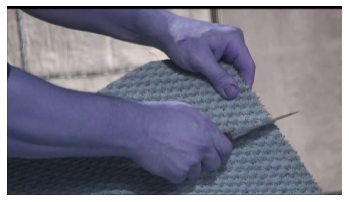

In [ ]:
plt.imshow(frames[0], interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
                   trainable=False),  # Can be True, see below.
])

In [ ]:
m.build([None, 600, 600, 3])  # Batch input shape.

In [ ]:
def extract_features_from_video_frames(video_name):
    representative_frames = extract_frames_from_video(video_name)
    representative_frames = representative_frames / 255
    resized_frames = tf.image.resize_with_crop_or_pad(representative_frames, 600, 600)
    frames_features = m.predict(resized_frames)
    return frames_features

In [ ]:
features = extract_features_from_video_frames(working_video_names[0])

In [ ]:
features.shape

(15, 2560)

In [ ]:
features_path = os.getcwd() + '/drive/MyDrive/video_frame_features/'
np.save(features_path + working_video_names[0], features)

In [ ]:
def save_features_from_video_frames(video_name):
    representative_frames = extract_frames_from_video(video_name)
    representative_frames = representative_frames / 255
    resized_frames = tf.image.resize_with_crop_or_pad(representative_frames, 600, 600)
    frames_features = m.predict(resized_frames)
    
    features_path = os.getcwd() + '/drive/MyDrive/video_frame_features/'
    np.save(features_path + video_name, frames_features)

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(len(working_video_names))):
    save_features_from_video_frames(working_video_names[i])

 34%|███▍      | 500/1450 [12:35<13:28,  1.18it/s]

In [ ]:
# in case extraction was interrupted midway
for i in tqdm(range(len(unprocessed_video_names))):
    save_features_from_video_frames(unprocessed_video_names[i])

100%|██████████| 55/55 [02:05<00:00,  2.28s/it]


# Load captions

In [ ]:
captions_path = os.getcwd() + '/drive/MyDrive/MLDS_hw2_data/MSR Video Description Corpus.csv'

#captions_path = os.getcwd() + '/MLDS_hw2_data/MSR Video Description Corpus.csv'

In [ ]:
all_languages_captions_df = pd.read_csv(captions_path)
all_languages_captions_df.head()

,VideoID,Start,End,WorkerID,Source,AnnotationTime,Language,Description
0,mv89psg6zh4,33,46,588702,unverified,55,Slovene,Papagaj se umiva pod tekočo vodo v lijaku.
1,mv89psg6zh4,33,46,588702,unverified,37,Slovene,Papagaj se umiva pod tekočo vodo v lijaku.
2,mv89psg6zh4,33,46,362812,unverified,11,Macedonian,папагал се бања
3,mv89psg6zh4,33,46,968828,unverified,84,German,Ein Wellensittich duscht unter einem Wasserhahn.
4,mv89psg6zh4,33,46,203142,unverified,14,Romanian,o pasare sta intr-o chiuveta.


In [ ]:
all_languages_captions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122665 entries, 0 to 122664
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   VideoID         122665 non-null  object
 1   Start           122665 non-null  int64 
 2   End             122665 non-null  int64 
 3   WorkerID        122665 non-null  int64 
 4   Source          122665 non-null  object
 5   AnnotationTime  122665 non-null  int64 
 6   Language        122665 non-null  object
 7   Description     122664 non-null  object
dtypes: int64(4), object(4)
memory usage: 7.5+ MB


In [ ]:
all_languages_captions_df['Language'].unique()

array(['Slovene', 'Macedonian', 'German', 'Romanian', 'Georgian',
       'Serbian', 'French', 'Gujarati', 'Hindi', 'English', 'Tamil',
       'Dutch', 'Tagalog', 'Polish', 'Spanish', 'Russian', 'Arabic',
       'Italian', 'Filipino', 'Malayalam', 'Chinese', 'Portuguese',
       'Estonian', 'Norwegian', 'Malay', 'Urdu', 'Hungarian', 'Turkish',
       'Indonesian', 'Danish', 'Bosnian', 'Albanian', 'Bulgarian',
       'Marathi', 'Swedish'], dtype=object)

In [ ]:
# only keep english captions
captions_df = all_languages_captions_df[all_languages_captions_df['Language'] == 'English']

In [ ]:
# only keep non NaN captions
captions_df = captions_df[~captions_df['Description'].isna()]

In [ ]:
len(captions_df)

85549

In [ ]:
# captioned video part lengths
(captions_df['End'] - captions_df['Start']).describe()

count    85549.000000
mean        10.221078
std          6.723401
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         60.000000
dtype: float64

In [ ]:
# The length of captions in words
captions_df['Description'].str.split().str.len().describe()

count    85549.000000
mean         7.099884
std          2.989527
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max        137.000000
Name: Description, dtype: float64

In [ ]:
# Convert start and end columns to string
captions_df['Start'] = captions_df['Start'].apply(str)
captions_df['End'] = captions_df['End'].apply(str)

### Only keep captions for videos present in training data

In [ ]:
captions_df['Video_name'] = captions_df['VideoID']+ '_' + captions_df['Start']+ '_' + captions_df['End']
captions_df['Video_name']

18        mv89psg6zh4_33_46
19        mv89psg6zh4_33_46
20        mv89psg6zh4_33_46
21        mv89psg6zh4_33_46
22        mv89psg6zh4_33_46
                ...        
122658    m7x8uIdg2XU_67_73
122659    m7x8uIdg2XU_67_73
122660    m7x8uIdg2XU_67_73
122661    m7x8uIdg2XU_67_73
122662    m7x8uIdg2XU_67_73
Name: Video_name, Length: 85549, dtype: object

In [ ]:
len(captions_df['Video_name'].unique())

2089

In [ ]:
from pathlib import Path

In [ ]:
def check_if_video_exists(video_name):
    #video_path = os.getcwd() + '/MLDS_hw2_data/training_data/video/' + video_name + '.avi'
    video_path = os.getcwd() + '/drive/MyDrive/video_frame_features/' + video_name + '.npy'
    my_file = Path(video_path)
    if my_file.is_file():
        return True
    else:
        return False

In [ ]:
captions_df = captions_df[captions_df['Video_name'].apply(check_if_video_exists)]

In [ ]:
len(captions_df)

59590

# Tokenize the captions

In [ ]:
captions_df['Description'].iloc[0]

'A bird in a sink keeps getting under the running water from a faucet.'

In [ ]:
# keep only captions with no more than 12 words (~95.5% of all captions)
#captions_df = captions_df[captions_df['Description_length'] <= 12]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81583 entries, 19 to 122662
Data columns (total 10 columns):
VideoID               81583 non-null object
Start                 81583 non-null int64
End                   81583 non-null int64
WorkerID              81583 non-null int64
Source                81583 non-null object
AnnotationTime        81583 non-null int64
Language              81583 non-null object
Description           81583 non-null object
Video_length          81583 non-null int64
Description_length    81583 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 6.8+ MB


In [ ]:
# only keep clips with length no nore than 24 and captions with length no more than 24
#captions_df[(captions_df['Video_length'] <= 24) & (captions_df['Description_length'] <= 24)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85392 entries, 18 to 122662
Data columns (total 10 columns):
VideoID               85392 non-null object
Start                 85392 non-null int64
End                   85392 non-null int64
WorkerID              85392 non-null int64
Source                85392 non-null object
AnnotationTime        85392 non-null int64
Language              85392 non-null object
Description           85392 non-null object
Video_length          85392 non-null int64
Description_length    85392 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 7.2+ MB


In [ ]:
captions_df['Description'].str.replace(r"<br\s*/?>", r" ").str.lower().str.replace(r"[^a-zA-Z']", r" ").str.split()

18        [a, bird, in, a, sink, keeps, getting, under, ...
19                      [a, bird, is, bathing, in, a, sink]
20        [a, bird, is, splashing, around, under, a, run...
21                      [a, bird, is, bathing, in, a, sink]
22        [a, bird, is, standing, in, a, sink, drinking,...
                                ...                        
122548                [a, woman, is, slicing, some, onions]
122549     [onion, is, been, cut, and, been, shooped, also]
122550         [the, person, is, making, the, tomato, supe]
122551                               [how, to, chop, onion]
122552                            [the, man, chops, onions]
Name: Description, Length: 59590, dtype: object

In [ ]:
# remove punctuation from the captions, all symbols to lowercase, split the caption into words
captions_df['Description'] = captions_df['Description'].str.replace(r"<br\s*/?>", r" ").str.lower().str.replace(r"[^a-zA-Z']", r" ").str.split()

In [ ]:
captions_df['Description'].head()

18    [a, bird, in, a, sink, keeps, getting, under, ...
19                  [a, bird, is, bathing, in, a, sink]
20    [a, bird, is, splashing, around, under, a, run...
21                  [a, bird, is, bathing, in, a, sink]
22    [a, bird, is, standing, in, a, sink, drinking,...
Name: Description, dtype: object

In [ ]:
captions_df['Description_length'] = captions_df['Description'].map(len)

In [ ]:
captions_df['Description'].values

array([list(['a', 'bird', 'in', 'a', 'sink', 'keeps', 'getting', 'under', 'the', 'running', 'water', 'from', 'a', 'faucet']),
       list(['a', 'bird', 'is', 'bathing', 'in', 'a', 'sink']),
       list(['a', 'bird', 'is', 'splashing', 'around', 'under', 'a', 'running', 'faucet']),
       ...,
       list(['the', 'person', 'is', 'making', 'the', 'tomato', 'supe']),
       list(['how', 'to', 'chop', 'onion']),
       list(['the', 'man', 'chops', 'onions'])], dtype=object)

In [ ]:
word_array = np.concatenate(captions_df['Description'].values)

In [ ]:
len(word_array)

424326

In [ ]:
from collections import Counter
vocabulary = Counter()

In [ ]:
vocabulary.update(word_array)

In [ ]:
vocabulary.most_common()[:10]

[('a', 66818),
 ('is', 32591),
 ('the', 21850),
 ('man', 17020),
 ('woman', 7525),
 ('on', 7185),
 ('in', 7062),
 ('are', 5429),
 ('playing', 5345),
 ('of', 5183)]

In [ ]:
len(vocabulary)

10742

In [ ]:
# only keep a word if the word appeared more than once
truncated_vocabulary = {k:v for (k,v) in vocabulary.items() if v > 1}

In [ ]:
vocab_size = len(truncated_vocabulary)
vocab_size

6079

In [ ]:
# dictionary for encoding words into ids
# do i need <unk> token or oob_ will cover the need?
word_to_id = {word: id_ + 3 for id_, word in enumerate(truncated_vocabulary)}
for id_, token in enumerate(("<pad>", "<bos>", "<eos>")):
    word_to_id[token] = id_

In [ ]:
caption_example = captions_df['Description'].iloc[2]
caption_example

['a', 'bird', 'is', 'splashing', 'around', 'under', 'a', 'running', 'faucet']

In [ ]:
for word in caption_example:
    print(word_to_id.get(word) or vocab_size)

3
4
15
17
18
9
3
11
14


In [ ]:
# dictionary for decoding
id_to_word = {id_: word for word, id_ in word_to_id.items()}

In [ ]:
encoded_caption_example = [word_to_id[word] for word in caption_example]
encoded_caption_example

[3, 4, 15, 17, 18, 9, 3, 11, 14]

In [ ]:
[id_to_word[id_] for id_ in encoded_caption_example]

['a', 'bird', 'is', 'splashing', 'around', 'under', 'a', 'running', 'faucet']

In [ ]:
words = tf.constant(list(id_to_word.values()))
word_ids = tf.constant(list(word_to_id.values()), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [ ]:
vocab_size = len(words)

In [ ]:
table.lookup(tf.constant(caption_example))

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 3,  4, 15, 17, 18,  9,  3, 11, 14])>

In [ ]:
def encode_words_to_id(word_list):
    return table.lookup(tf.constant(word_list))

## GloVe Embeddings

In [ ]:
#path_to_glove_file = os.getcwd() + "/glove.6B.300d.txt"
path_to_glove_file = os.getcwd() + "/drive/MyDrive/video_to_text_caption/glove.6B.300d.txt" 

embeddings_index = {}
with open(path_to_glove_file, encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

In [ ]:
embed_size = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = (np.random.rand(vocab_size + num_oov_buckets, embed_size) * 2)-1 # initialize it randomly with values from -1 to 1
for word, i in word_to_id.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 5695 words (387 misses)


In [ ]:
embedding_layer = keras.layers.Embedding(
    vocab_size + num_oov_buckets,
    embed_size,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=True,
    name="caption_embedding"
)

In [ ]:
del embeddings_index

## Subword tokenization

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import WordPiece

In [ ]:
tokenizer = Tokenizer(WordPiece(unk_token="<unk>"))

In [ ]:
vocab_size = 4000

In [ ]:
from tokenizers.trainers import WordPieceTrainer

trainer = WordPieceTrainer(vocab_size = vocab_size, special_tokens=["<pad>", "<bos>", "<eos>", "<unk>"])

In [ ]:
from tokenizers.pre_tokenizers import Whitespace

tokenizer.pre_tokenizer = Whitespace()

In [ ]:
captions_df['Description'].values

array(['A bird in a sink keeps getting under the running water from a faucet.',
       'A bird is bathing in a sink.',
       'A bird is splashing around under a running faucet.', ...,
       'the person is making the tomato supe', 'How to chop Onion',
       'The man chops onions.'], dtype=object)

In [ ]:
# remove punctuation from the captions, all symbols to lowercase
captions_df['Description'] = captions_df['Description'].str.replace(r"<br\s*/?>", r" ").str.lower().str.replace(r"[^a-zA-Z']", r" ").values

In [ ]:
tokenizer.train_from_iterator(captions_df['Description'].values, trainer)

In [ ]:
output = tokenizer.encode("the man chops onionsss")

In [ ]:
output.ids

[62, 64, 1019, 602, 249]

In [ ]:
captions_df['Description_encoded'] = captions_df['Description'].map(lambda x: tokenizer.encode(x).ids)

In [ ]:
captions_df['Description_encoded_length'] = captions_df['Description_encoded'].map(len)

# Prepare data for the model

In [ ]:
def get_padded_data(caption_index):
    video_name = captions_df['VideoID'].iloc[caption_index] + '_' + captions_df['Start'].iloc[caption_index] + '_' + captions_df['End'].iloc[caption_index]
    stored_features_path = os.getcwd() + '/MLDS_hw2_data/video_frame_features/' + video_name + '.npy'
    features_array = np.load(stored_features_path)
    video_features_shape = features_array.shape
    input_cnn_padding_length = captions_df['Description_length'].iloc[caption_index] + 1
    input_cnn_padding_array = np.full([input_cnn_padding_length, 2560], 0)
    input_cnn_padded_array =  np.concatenate((features_array, input_cnn_padding_array))
    
    list_first_half = video_features_shape[0]*['<pad>']
    input_sequence_caption = list_first_half + ['<bos>'] + captions_df['Description'].iloc[caption_index]
    target_sequence_caption = list_first_half + captions_df['Description'].iloc[caption_index] + ['<eos>']
    
    return [input_cnn_padded_array, input_sequence_caption], target_sequence_caption

In [ ]:
[input_cnn, input_caption], target_caption = get_padded_data(50)

In [ ]:
input_caption

['<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<bos>',
 'the',
 'avi',
 'n',
 'airplane',
 'is',
 'flying',
 'high',
 'in',
 'the',
 'sky']

In [ ]:
def get_input_sequence_caption(caption_df):
    number_of_frames = 
    list_first_half = number_of_frames*['<pad>']
    input_sequence_caption = list_first_half + ['<bos>'] + caption_df['Description']
    return input_sequence_caption

In [ ]:
def get_sequence_caption(caption, video_length):
    number_of_frames = 
    list_first_half = number_of_frames*['<pad>']
    target_sequence_caption = list_first_half + caption + ['<eos>']
    return target_sequence_caption

In [ ]:
def padding_part_of_caption_sequence(video_length):
    return video_length*['<pad>']

In [ ]:
def padding_part_of_caption_sequence_id(video_length):
    return video_length*[0]

In [ ]:
def append_bos_token(sequence_list):
    return sequence_list + ['<bos>']

In [ ]:
def append_bos_token_id(sequence_list):
    return sequence_list + [1]

In [ ]:
video_name_list = []
number_of_frames_list = []

In [ ]:
#training_video_features_path = os.getcwd() + '/MLDS_hw2_data/training_data/video_frame_features'
training_video_features_path = os.getcwd() + '/drive/MyDrive/video_frame_features'
training_video_features_path

'/content/drive/MyDrive/video_frame_features'

In [ ]:
from os import walk

_, _, filenames = next(walk(training_video_features_path))

In [ ]:
# after the first time, it may be faster to load the computed dict

# for filename in filenames:
#     np_path = training_video_features_path + '/' + filename
#     video_name_list.append(filename[:-4])
#     number_of_frames = np.load(np_path).shape[0]
#     number_of_frames_list.append(number_of_frames)

# video_frames_dict = dict(zip(video_name_list, number_of_frames_list))

In [ ]:
import pickle

with open('/content/drive/MyDrive/video_to_text_caption/video_frames_dict.pickle', 'rb') as handle:
    video_frames_dict = pickle.load(handle)

In [ ]:
captions_df['Number_of_frames'] = captions_df['Video_name'].map(video_frames_dict)

In [ ]:
# create padded caption to use as input, with <bos> token
captions_df['input_sequence_caption'] = (captions_df['Number_of_frames']).apply(padding_part_of_caption_sequence).apply(append_bos_token) + captions_df['Description']

In [ ]:
# for subword tokenization
captions_df['input_sequence_caption_id'] = (captions_df['Number_of_frames']).apply(padding_part_of_caption_sequence_id).apply(append_bos_token_id) + captions_df['Description_encoded']

In [ ]:
def append_eos_token(sequence_list):
    return sequence_list + ['<eos>']

In [ ]:
def append_eos_token_id(sequence_list):
    return sequence_list + [2]

In [ ]:
# create padded caption to use as target, with <eos> token
captions_df['target_sequence_caption'] = ((captions_df['Number_of_frames']).apply(padding_part_of_caption_sequence) + captions_df['Description']).apply(append_eos_token)

In [ ]:
# for subword tokenization. create padded caption to use as target, with <eos> token id
captions_df['target_sequence_caption_id'] = ((captions_df['Number_of_frames']).apply(padding_part_of_caption_sequence_id) + captions_df['Description_encoded']).apply(append_eos_token_id)

In [ ]:
type(captions_df['target_sequence_caption_id'].iloc[50])

list

In [ ]:
# convert caption sequences from list to numpy arrays
captions_df['input_sequence_caption'] = captions_df['input_sequence_caption'].apply(lambda x: np.array(x))
captions_df['target_sequence_caption'] = captions_df['target_sequence_caption'].apply(lambda x: np.array(x))

In [ ]:
# convert caption sequences from list to numpy arrays
captions_df['input_sequence_caption_id'] = captions_df['input_sequence_caption_id'].apply(lambda x: np.array(x))
captions_df['target_sequence_caption_id'] = captions_df['target_sequence_caption_id'].apply(lambda x: np.array(x))

## Create data loading pipeline

In [ ]:
captions_df['Video_name'].iloc[:48025]

18         mv89psg6zh4_33_46
19         mv89psg6zh4_33_46
20         mv89psg6zh4_33_46
21         mv89psg6zh4_33_46
22         mv89psg6zh4_33_46
                ...         
98985       4wT7zM8XgXQ_5_11
98986       4wT7zM8XgXQ_5_11
98987       4wT7zM8XgXQ_5_11
98988       4wT7zM8XgXQ_5_11
98997    pfQPRXcihkI_127_138
Name: Video_name, Length: 48025, dtype: object

In [ ]:
# training-validation split is about 80-20
train_size = 48024

In [ ]:
#features = ['input_sequence_caption', 'Video_name', 'target_sequence_caption']

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.ragged.constant(captions_df['input_sequence_caption'].iloc[:train_size].values),
            tf.ragged.constant(captions_df['target_sequence_caption'].iloc[:train_size].values),
            tf.ragged.constant(captions_df['Video_name'].iloc[:train_size].values),
        )
    )
)

In [ ]:
# subword tokenization (inputs already converted to ids)
training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.ragged.constant(captions_df['input_sequence_caption_id'].iloc[:train_size].values),
            tf.ragged.constant(captions_df['target_sequence_caption_id'].iloc[:train_size].values),
            tf.ragged.constant(captions_df['Video_name'].iloc[:train_size].values)
        )
    )
)

In [ ]:
# word tokenization
subsample_rate = 1

validation_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.ragged.constant(captions_df['input_sequence_caption'].iloc[train_size::subsample_rate].values),
            tf.ragged.constant(captions_df['target_sequence_caption'].iloc[train_size::subsample_rate].values),
            tf.ragged.constant(captions_df['Video_name'].iloc[train_size::subsample_rate].values),
        )
    )
)

In [ ]:
# subword tokenization (inputs already converted to ids)
# subsample captions to speed up the evaluation part (we still sample all the videos)
subsample_rate = 2

validation_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.ragged.constant(captions_df['input_sequence_caption_id'].iloc[train_size::subsample_rate].values),
            tf.ragged.constant(captions_df['target_sequence_caption_id'].iloc[train_size::subsample_rate].values),
            tf.ragged.constant(captions_df['Video_name'].iloc[train_size::subsample_rate].values)
        )
    )
)

In [ ]:
captions_df['input_sequence_caption'].map(len).describe()

count    59590.000000
mean        19.050780
std          6.848941
min          7.000000
25%         15.000000
50%         17.000000
75%         22.000000
max        148.000000
Name: input_sequence_caption, dtype: float64

In [ ]:
#load video features array and pad it, return padded tensor 
def get_padded_input_cnn(video_name_tensor, caption_length_tensor):
    stored_features_path = os.getcwd() + '/MLDS_hw2_data/video_frame_features/' + video_name_tensor.numpy().decode('ascii') + '.npy'
    features_array = np.load(stored_features_path)
    input_cnn_padding_length = caption_length_tensor + 1
    input_cnn_padding_array = np.full([input_cnn_padding_length, 2560], 0)
    input_cnn_padded_array =  np.concatenate((features_array, input_cnn_padding_array))
    return tf.constant(input_cnn_padded_array)

In [ ]:
for input_seq, target_seq, video_name, caption_length in training_dataset.take(4):
    print(get_padded_input_cnn(video_name, caption_length))

tf.Tensor(
[b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>'
 b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<bos>' b'a'
 b'bird' b'in' b'a' b'sink' b'keeps' b'getting' b'under' b'the' b'running'
 b'water' b'from' b'a' b'faucet'], shape=(29,), dtype=string)
tf.Tensor(
[b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>'
 b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<bos>' b'a'
 b'bird' b'is' b'bathing' b'in' b'a' b'sink'], shape=(22,), dtype=string)
tf.Tensor(
[b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>'
 b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<bos>' b'a'
 b'bird' b'is' b'splashing' b'around' b'under' b'a' b'running' b'faucet'], shape=(24,), dtype=string)
tf.Tensor(
[b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>'
 b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<bos>' b'a'
 b'bird' b'is' b'bathing' b'in' b'a' b'sink'], shape=(22,), dtype=string)


In [ ]:
os.getcwd()

'/content'

In [ ]:
#
def get_padded_input_cnn_batch(input_seq_batch, target_seq_batch, video_name_batch_tensor):
    max_length = input_seq_batch.shape[1]
    batch_size = input_seq_batch.shape[0]
    input_cnn_padded_batch_array = np.empty((batch_size,max_length,2560))
    
    for ind, video_name_tensor in enumerate(video_name_batch_tensor):
        #get_padded_input_cnn(video_name_tensor, caption_length_tensor)
        #stored_features_path = os.getcwd() + '/MLDS_hw2_data/video_frame_features/' + video_name_tensor.numpy().decode('ascii') + '.npy'
        stored_features_path = os.getcwd() + '/drive/MyDrive/video_frame_features/' + video_name_tensor.numpy().decode('ascii') + '.npy'
        features_array = np.load(stored_features_path)
        
        needed_padding_length = max_length - features_array.shape[0]
        #input_cnn_padding_length = caption_length_tensor + 1
        input_cnn_padding_array = np.full([needed_padding_length, 2560], 0)
        input_cnn_padded_array =  np.concatenate((features_array, input_cnn_padding_array))
        input_cnn_padded_batch_array[ind] = input_cnn_padded_array
        
    return tf.constant(input_cnn_padded_batch_array)

In [ ]:
for input_seq, target_seq, video_name, caption_length in training_dataset.shuffle(200).map(lambda input_seq, target_seq, video_name, caption_length: [table.lookup(input_seq), table.lookup(target_seq), video_name, caption_length]).padded_batch(2).prefetch(1).take(1):
    print(input_seq, target_seq, video_name, caption_length, get_padded_input_cnn_batch(input_seq, target_seq, video_name))

Cause: could not parse the source code:

for input_seq, target_seq, video_name, caption_length in training_dataset.shuffle(200).map(lambda input_seq, target_seq, video_name, caption_length: [table.lookup(input_seq), table.lookup(target_seq), video_name, caption_length]).padded_batch(2).prefetch(1).take(1):

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

for input_seq, target_seq, video_name, caption_length in training_dataset.shuffle(200).map(lambda input_seq, target_seq, video_name, caption_length: [table.lookup(input_seq), table.lookup(target_seq), video_name, caption_length]).padded_batch(2).prefetch(1).take(1):

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
tf.Tensor(
[[  0   0   0   0   0   0   0

In [ ]:
def element_length_fn(input_seq, target_seq, video_name):
    return tf.shape(input_seq)[0]

In [ ]:
shuffle_buffer_size = train_size
batch_size = 24

In [ ]:
# word tokenization
training_dataset = training_dataset.shuffle(shuffle_buffer_size)
training_dataset = training_dataset.map(lambda input_seq, target_seq, video_name: 
                                        [table.lookup(input_seq), table.lookup(target_seq), video_name])
training_dataset = training_dataset.apply(
        tf.data.experimental.bucket_by_sequence_length(element_length_func=element_length_fn, 
        bucket_batch_sizes = [batch_size, batch_size, batch_size, batch_size, batch_size, batch_size, batch_size], 
        bucket_boundaries=[11, 15, 19, 25, 35, 50],))
training_dataset = training_dataset.map(lambda input_seq_batch, target_seq_batch, video_name_batch:  
        [((tf.py_function(func=get_padded_input_cnn_batch, inp=[input_seq_batch, target_seq_batch, video_name_batch], Tout=tf.float64)), input_seq_batch), target_seq_batch])
training_dataset = training_dataset.prefetch(1)

In [ ]:
# subword tokenization (inputs already converted to ids)
training_dataset = training_dataset.shuffle(shuffle_buffer_size)
training_dataset = training_dataset.map(lambda input_seq, target_seq, video_name: 
                                        [input_seq, target_seq, video_name])
training_dataset = training_dataset.apply(
        tf.data.experimental.bucket_by_sequence_length(element_length_func=element_length_fn, 
        bucket_batch_sizes = [batch_size, batch_size, batch_size, batch_size, batch_size, batch_size, batch_size], 
        bucket_boundaries=[11, 15, 19, 25, 35, 50],))
training_dataset = training_dataset.map(lambda input_seq_batch, target_seq_batch, video_name_batch:  
        [((tf.py_function(func=get_padded_input_cnn_batch, inp=[input_seq_batch, target_seq_batch, video_name_batch], Tout=tf.float64)), input_seq_batch), target_seq_batch])
training_dataset = training_dataset.prefetch(1)

In [ ]:
# batches of elements of different sizes, all padded to the longest element in the batch. results in a lot of
# padding

# training_dataset = training_dataset.shuffle(shuffle_buffer_size)
# training_dataset = training_dataset.map(lambda input_seq, target_seq, video_name, caption_length: 
#                                         [table.lookup(input_seq), table.lookup(target_seq), video_name])
# training_dataset = training_dataset.padded_batch(batch_size)
# training_dataset = training_dataset.map(lambda input_seq_batch, target_seq_batch, video_name_batch: 
#         [((tf.py_function(func=get_padded_input_cnn_batch, inp=[input_seq_batch, target_seq_batch, 
#         video_name_batch], Tout=tf.float64)), input_seq_batch), target_seq_batch])
# training_dataset = training_dataset.prefetch(1)

In [ ]:
# only batches of size 1

#training_dataset = training_dataset.shuffle(shuffle_buffer_size)
#training_dataset = training_dataset.map(lambda input_seq, target_seq, video_name, caption_length: [(tf.py_function(func=get_padded_input_cnn,
#          inp=[video_name, caption_length], Tout=tf.float64), table.lookup(input_seq)), table.lookup(target_seq)])
#training_dataset = training_dataset.batch(batch_size)
#training_dataset = training_dataset.prefetch(1)

In [ ]:
for (input_cnn_padded_tensor, input_seq), target_seq in training_dataset.take(1):
    print(input_cnn_padded_tensor, input_seq, target_seq)

In [ ]:
# shuffle_buffer_size_valid = 10000

# validation_dataset = validation_dataset.shuffle(shuffle_buffer_size_valid)
# validation_dataset = validation_dataset.map(lambda input_seq, target_seq, video_name, caption_length: [(tf.py_function(func=get_padded_input_cnn,
#           inp=[video_name, caption_length], Tout=tf.float64), table.lookup(input_seq)), table.lookup(target_seq)])
# validation_dataset = validation_dataset.batch(1)
# validation_dataset = validation_dataset.prefetch(1)

In [ ]:
#word tokenization

batch_size_val = 500

validation_dataset = validation_dataset.map(lambda input_seq, target_seq, video_name: 
                                        [table.lookup(input_seq), table.lookup(target_seq), video_name])
validation_dataset = validation_dataset.apply(
        tf.data.experimental.bucket_by_sequence_length(element_length_func=element_length_fn, 
        bucket_batch_sizes = [batch_size_val, batch_size_val, batch_size_val, batch_size_val, batch_size_val, batch_size_val, batch_size_val], 
        bucket_boundaries=[11, 15, 19, 25, 35, 50],))
validation_dataset = validation_dataset.map(lambda input_seq_batch, target_seq_batch, video_name_batch:  
        [((tf.py_function(func=get_padded_input_cnn_batch, inp=[input_seq_batch, target_seq_batch, video_name_batch], Tout=tf.float64)), input_seq_batch), target_seq_batch])
validation_dataset = validation_dataset.prefetch(1)

In [ ]:
#subword tokenization

batch_size_val = 500

validation_dataset = validation_dataset.map(lambda input_seq, target_seq, video_name: 
                                        [input_seq, target_seq, video_name])
validation_dataset = validation_dataset.apply(
        tf.data.experimental.bucket_by_sequence_length(element_length_func=element_length_fn, 
        bucket_batch_sizes = [batch_size_val, batch_size_val, batch_size_val, batch_size_val, batch_size_val, batch_size_val, batch_size_val], 
        bucket_boundaries=[11, 15, 19, 25, 35, 50],))
validation_dataset = validation_dataset.map(lambda input_seq_batch, target_seq_batch, video_name_batch:  
        [((tf.py_function(func=get_padded_input_cnn_batch, inp=[input_seq_batch, target_seq_batch, video_name_batch], Tout=tf.float64)), input_seq_batch), target_seq_batch])
validation_dataset = validation_dataset.prefetch(1)

In [ ]:
for (input_cnn_padded_tensor, input_seq), target_seq in validation_dataset.take(1):
    print(input_cnn_padded_tensor, input_seq, target_seq)

# Create the model

In [ ]:
lstm_size = 1000
cnn_embed_size = 500

In [ ]:
input_cnn = keras.layers.Input(shape=[None, 2560], dtype=tf.float64, name="input_cnn")
input_caption = keras.layers.Input(shape=[None], dtype=tf.int64, name="teacher_forcing")

cnn_embedding = keras.layers.TimeDistributed(keras.layers.Dense(cnn_embed_size, activation= None), name="cnn_embedding")(input_cnn) #keras.layers.Embedding(2560, embed_size)
lstm_1 = keras.layers.LSTM(lstm_size, return_sequences=True, name="lstm_1")
lstm_1_outputs= lstm_1(cnn_embedding)
#lstm_1_state = [state_h_1, state_c_1]

mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0), name="mask")(input_caption)
caption_embedding = embedding_layer(input_caption)
concat=keras.layers.concatenate([lstm_1_outputs, caption_embedding])
lstm_2_outputs = keras.layers.LSTM(lstm_size, return_sequences=True, name="lstm_2")(concat, mask = mask) #return_state= True

output=keras.layers.TimeDistributed(keras.layers.Dense(vocab_size + num_oov_buckets, activation="softmax"), name="output")(lstm_2_outputs, mask = mask)
model=keras.Model(inputs=[input_cnn,input_caption],outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_cnn (InputLayer)          [(None, None, 2560)] 0                                            
__________________________________________________________________________________________________
cnn_embedding (TimeDistributed) (None, None, 500)    1280500     input_cnn[0][0]                  
__________________________________________________________________________________________________
teacher_forcing (InputLayer)    [(None, None)]       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, None, 1000)   6004000     cnn_embedding[0][0]              
______________________________________________________________________________________________

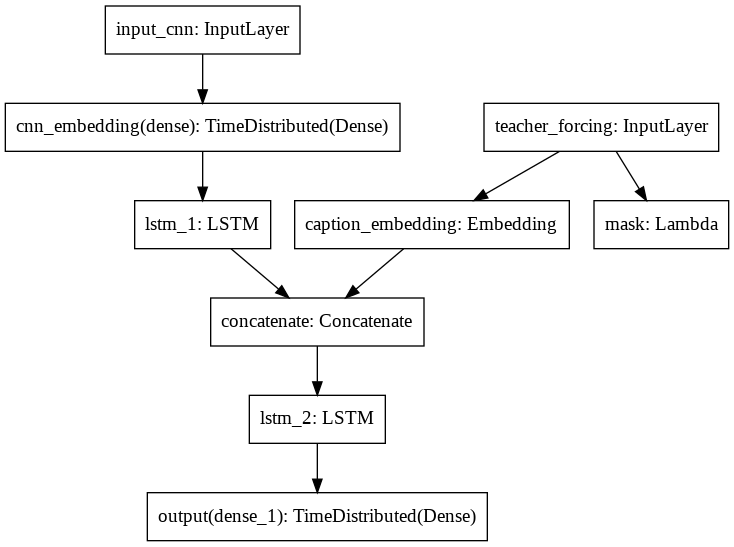

In [ ]:
tf.keras.utils.plot_model(model)

# Train the model

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
#early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
history = model.fit(training_dataset, steps_per_epoch=train_size // batch_size,
                    epochs=1) #validation_data=validation_dataset, callbacks = [checkpoint_cb]

2001/2001 [==============================] - 231s 115ms/step - loss: 0.7025


In [ ]:
model.evaluate(validation_dataset)

27/27 [==============================] - 21s 760ms/step - loss: 1.2533


1.2533210515975952

In [ ]:
model.save_weights('/content/drive/MyDrive/video_to_text_caption/saved_models/3_epoch_0.70-1.25/weights')

In [ ]:
model.save('/content/drive/MyDrive/video_to_text_caption/saved_models/3_epoch_0.70-1.25/whole_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/video_to_text_caption/saved_models/3_epoch_0.70-1.25/whole_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/video_to_text_caption/saved_models/3_epoch_0.70-1.25/whole_model/assets


In [ ]:
### bucketize batches, so that batches have inputs of similar length, so that there's less less padding

In [ ]:
history.history['loss']

[1.5235053300857544]

# Inference

In [ ]:
for (input_cnn_padded_tensor, input_seq), target_seq in validation_dataset.take(1):
    print(x)

((<tf.Tensor: shape=(1, 34, 2560), dtype=float64, numpy=
array([[[-0.05294585, -0.01425924, -0.06017883, ..., -0.07053109,
          0.05845396, -0.21794927],
        [-0.06323393, -0.04693527, -0.0912714 , ..., -0.0675286 ,
          0.11931462, -0.14179799],
        [-0.11997658, -0.08642358, -0.14230606, ..., -0.13929003,
          0.1061065 , -0.18533038],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])>, <tf.Tensor: shape=(1, 34), dtype=int64, numpy=
array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,   10, 1783, 6561,  249, 5964,   29,   10,   86,
        1008]], dtype=int64)>), <tf.Tensor: s

In [ ]:
captions_df[['input_sequence_caption', 'target_sequence_caption', 'Video_name', 'Description_length']].iloc[train_size+1000]

input_sequence_caption     [<pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pa...
target_sequence_caption    [<pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pa...
Video_name                                               b24_bb57PPk_631_637
Description_length                                                         7
Name: 100945, dtype: object

In [ ]:
captions_df['input_sequence_caption'].iloc[train_size+777]

array(['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<bos>', 'a', 'lady',
       'is', 'pouring', 'water'], dtype='<U7')

In [ ]:
table.lookup(tf.constant(captions_df['target_sequence_caption'].iloc[train_size+777]))

<tf.Tensor: shape=(11,), dtype=int64, numpy=array([  0,   0,   0,   0,   0,   3, 155,  15,  22,  12,   2], dtype=int64)>

In [ ]:
captions_df['Video_name'].iloc[train_size+777]

'-rkErLY0rRc_63_67'

In [ ]:
captions_df['Description_length'].iloc[train_size+777]

5

In [ ]:
get_padded_input_cnn(tf.constant(captions_df['Video_name'].iloc[train_size+777]), tf.constant((captions_df['Description_length'].iloc[train_size+777])))

<tf.Tensor: shape=(11, 2560), dtype=float64, numpy=
array([[-0.10467137,  0.14506666, -0.01393161, ..., -0.03531716,
         0.03956807,  0.4601579 ],
       [-0.06183658, -0.00417932, -0.11848748, ..., -0.02962378,
         0.19028188,  0.15715776],
       [-0.10926142,  0.1881438 , -0.18087409, ..., -0.10994026,
        -0.02774874,  0.27254933],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])>

In [ ]:
sample_cnn_input = get_padded_input_cnn(tf.constant(captions_df['Video_name'].iloc[train_size+777]), tf.constant((captions_df['Description_length'].iloc[train_size+777])))
sample_cnn_input

<tf.Tensor: shape=(11, 2560), dtype=float64, numpy=
array([[-0.10467137,  0.14506666, -0.01393161, ..., -0.03531716,
         0.03956807,  0.4601579 ],
       [-0.06183658, -0.00417932, -0.11848748, ..., -0.02962378,
         0.19028188,  0.15715776],
       [-0.10926142,  0.1881438 , -0.18087409, ..., -0.10994026,
        -0.02774874,  0.27254933],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])>

In [ ]:
tf.expand_dims(sample_cnn_input,axis=0)

<tf.Tensor: shape=(1, 11, 2560), dtype=float64, numpy=
array([[[-0.10467137,  0.14506666, -0.01393161, ..., -0.03531716,
          0.03956807,  0.4601579 ],
        [-0.06183658, -0.00417932, -0.11848748, ..., -0.02962378,
          0.19028188,  0.15715776],
        [-0.10926142,  0.1881438 , -0.18087409, ..., -0.10994026,
         -0.02774874,  0.27254933],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])>

In [ ]:
sample_seq_input = table.lookup(tf.constant(captions_df['input_sequence_caption'].iloc[train_size+777]))
sample_seq_input

<tf.Tensor: shape=(11,), dtype=int64, numpy=array([  0,   0,   0,   0,   0,   1,   3, 155,  15,  22,  12], dtype=int64)>

In [ ]:
# 1 we feed the model exprected output at previous time steps
sample_prediction = model.predict((tf.expand_dims(sample_cnn_input,axis=0), tf.expand_dims(sample_seq_input,axis=0)))

In [ ]:
sample_prediction.shape

(1, 11, 6682)

In [ ]:
np.argmax(sample_prediction, axis=2).tolist()

[[3, 3, 3, 3, 3, 3, 85, 15, 28, 3, 2]]

In [ ]:
[id_to_word[id_] for id_ in np.argmax(sample_prediction, axis=2).tolist()[0]]

['a', 'a', 'a', 'a', 'a', 'a', 'man', 'is', 'playing', 'a', '<eos>']

In [ ]:
# 2 we first feed the cnn_inputs, then <bos> token, then its own output at the previous step



In [ ]:
sample_seq_input = table.lookup(tf.constant(captions_df['input_sequence_caption'].iloc[train_size+777]))
sample_seq_input

In [ ]:
# add a lot of padding to the cnn input, so that there's enough padding until the model outputs <eos> token
sample_cnn_input_unlim = get_padded_input_cnn(tf.constant(captions_df['Video_name'].iloc[train_size+777]), tf.constant(20))
sample_cnn_input_unlim

<tf.Tensor: shape=(26, 2560), dtype=float64, numpy=
array([[-0.10467137,  0.14506666, -0.01393161, ..., -0.03531716,
         0.03956807,  0.4601579 ],
       [-0.06183658, -0.00417932, -0.11848748, ..., -0.02962378,
         0.19028188,  0.15715776],
       [-0.10926142,  0.1881438 , -0.18087409, ..., -0.10994026,
        -0.02774874,  0.27254933],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])>

In [ ]:
captions_df['Number_of_frames'].iloc[train_size+777]

5

In [ ]:
table.lookup(tf.constant(append_bos_token(padding_part_of_caption_sequence(captions_df['Number_of_frames'].iloc[train_size+777]))))

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 1], dtype=int64)>

In [ ]:
input_seq = table.lookup(tf.constant(append_bos_token(padding_part_of_caption_sequence(captions_df['Number_of_frames'].iloc[train_size+777]))))
input_seq

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 1], dtype=int64)>

In [ ]:
one_step_prediction = model.predict((tf.expand_dims(sample_cnn_input_unlim[:6],axis=0), tf.expand_dims(input_seq,axis=0)))

In [ ]:
one_step_prediction.shape

(1, 6, 6682)

In [ ]:
next_predicted_token = np.argmax(one_step_prediction, axis=2)[0][-1]
#one_step_prediction[0][-1].argmax()
next_predicted_token

3

In [ ]:
next_predicted_token = tf.cast(tf.constant([next_predicted_token]), tf.int32)
next_predicted_token

In [ ]:
input_seq = tf.cast(input_seq, tf.int32)
input_seq

In [ ]:
input_seq_with_new = tf.concat([input_seq, next_predicted_token], axis = -1)
input_seq_with_new

In [ ]:
one_more_step_prediction = model.predict((tf.expand_dims(sample_cnn_input_unlim[:7],axis=0), tf.expand_dims(input_seq_with_new,axis=0)))

In [ ]:
one_more_step_prediction.shape

(1, 7, 6682)

In [ ]:
np.argmax(one_more_step_prediction, axis=2)[0][-1]

85

In [ ]:
id_to_word[85]

'man'

In [ ]:
sample_cnn_input_unlim = get_padded_input_cnn(tf.constant(captions_df['Video_name'].iloc[train_size+777]), tf.constant(20))
sample_cnn_input_unlim

In [ ]:
input_seq = table.lookup(tf.constant(append_bos_token(padding_part_of_caption_sequence(captions_df['Number_of_frames'].iloc[train_size+777]))))
initial_input_seq_length = len(input_seq)
END_TOKEN = 2

#result = np.array([[START_TOKEN]])
next_token = -1
for i in range(20):
    next_token = model.predict((tf.expand_dims(sample_cnn_input_unlim[:len(input_seq)],axis=0), tf.expand_dims(input_seq,axis=0)))[0][-1].argmax()
    if next_token == END_TOKEN:
        break
    input_seq = tf.concat([tf.cast(input_seq, tf.int32), tf.cast(tf.constant([next_token]), tf.int32)], axis = -1)
#output_seq = result[0][1:] # omit the first INPUT_TOKEN

In [ ]:
input_seq

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  0,  0,  0,  0,  1,  3, 85, 15, 28,  3, 86])>

In [ ]:
[id_to_word[id_] for id_ in input_seq[initial_input_seq_length:].numpy().tolist()]

['a', 'man', 'is', 'playing', 'a', 'guitar']

# Beam Search

In [ ]:
def add_to_clipboard(text):
    command = 'echo ' + text.strip() + '| clip'
    os.system(command)

In [ ]:
increment_to_try = 5350 #increment_to_try += 30
print(increment_to_try)
print(captions_df['Video_name'].iloc[train_size+increment_to_try])
add_to_clipboard(captions_df['Video_name'].iloc[train_size+increment_to_try])

In [ ]:
### with probabilities
beam_width = 10
maximum_caption_length = 10

sample_cnn_input_unlim = get_padded_input_cnn(tf.constant(captions_df['Video_name'].iloc[train_size+increment_to_try]), tf.constant(maximum_caption_length))
sample_cnn_input_unlim

input_seq = table.lookup(tf.constant(append_bos_token(padding_part_of_caption_sequence(captions_df['Number_of_frames'].iloc[train_size+increment_to_try]))))
initial_input_seq_length = len(input_seq)
certainty_lists = [[] for _ in range(beam_width)]
sentences = [input_seq for _ in range(beam_width)]
sentence_probabilities = [1 for _ in range(beam_width)]
END_TOKEN = 2


for i in range(maximum_caption_length):
    if i == 0:
        prediction = model.predict((tf.expand_dims(sample_cnn_input_unlim[:len(input_seq)],axis=0), tf.expand_dims(input_seq,axis=0)))[0][-1]
        next_tokens = prediction.argsort()[-beam_width:][::-1]
        for j in range(beam_width):
            sentences[j] = tf.concat([tf.cast(sentences[j], tf.int32), tf.cast(tf.constant([next_tokens[j]]), tf.int32)], axis = -1)
            sentence_probabilities[j] = sentence_probabilities[j] * prediction[next_tokens[j]]
            certainty_lists[j].append(prediction[next_tokens[j]])
    if i > 0:
        next_sentences = sentences.copy()
        next_certainty_lists = [[] for _ in range(beam_width)]
        next_token_probabilities = [[] for _ in range(beam_width)]
        next_sentence_probabilities = [[] for _ in range(beam_width)]
        for j in range(beam_width):
            prediction = model.predict((tf.expand_dims(sample_cnn_input_unlim[:len(sentences[j])],axis=0), tf.expand_dims(sentences[j],axis=0)))[0][-1]
            next_sentence_probabilities[j] = prediction * sentence_probabilities[j]
            next_token_probabilities[j] = prediction
        indices_of_most_probable_sentences = np.dstack(np.unravel_index(np.argsort(np.array(next_sentence_probabilities).ravel()), (beam_width, vocab_size + num_oov_buckets)))[0][-beam_width:][::-1]
        for k in range(beam_width):
            next_sentence_index = indices_of_most_probable_sentences[k][0]
            next_token_index = indices_of_most_probable_sentences[k][1]
            next_sentences[k] = tf.concat([tf.cast(sentences[next_sentence_index], tf.int32), tf.cast(tf.constant([next_token_index]), tf.int32)], axis = -1)
            sentence_probabilities[k] = next_sentence_probabilities[next_sentence_index][next_token_index]
            next_certainty_lists[k] = certainty_lists[next_sentence_index].copy()
            next_certainty_lists[k].append(next_token_probabilities[next_sentence_index][next_token_index])
        sentences = next_sentences
        certainty_lists = next_certainty_lists
    if next_token == END_TOKEN:
        break


In [ ]:
for i in range(beam_width):
    predicted_caption = [id_to_word[id_] for id_ in sentences[i][initial_input_seq_length:].numpy().tolist()]
    print(predicted_caption)
    for word, certainty in zip(predicted_caption, certainty_lists[i]):
        print(word, certainty)
    print("Sentence probability:", sentence_probabilities[i])
    print('\n')